# Complexity Visualization

### Time Complexiity Visualization

,log n,sqrt n,n,n log n,n^2,n^3,2^n,n!
second,0,1000000000000,1000000,11.383358,1000.0,100.0,500000.0,10
minute,0,3600000000000000,60000000,15.189266,7745.966692,391.486764,30000000.0,12
hour,0,12960000000000000000,3600000000,19.056777,60000.0,1532.618865,1800000000.0,13
day,0,7464960000000000000000,86400000000,22.087253,293938.769134,4420.837798,43200000000.0,14
month,0,6718464000000000000000000,2592000000000,25.350647,1609968.9438,13736.570911,1296000000000.0,16
year,0,967458816000000000000000000,31104000000000,27.745291,5577096.018539,31448.896731,15552000000000.0,17
century,0,9674588160000000000000000000000,3110400000000000,32.201514,55770960.185387,145972.847894,1555200000000000.0,18


AttributeError: 'AxesSubplot' object has no attribute 'line'

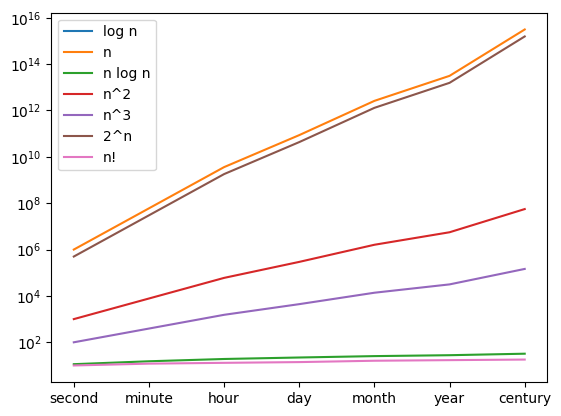

In [1]:
'''
! Get the Log(n) calculation working. Is it truely infinity, even for 1 seconds?
! Understand why the df.plot.line is throwing an error. Matplotlib issue?

'''
import pandas as pd
import numpy as np
from scipy.special import lambertw
import matplotlib.pyplot
import math

time_label = ['second','minute','hour','day','month','year','century']
time_in_seconds = np.array([1,60,3600,86400,2592000,31104000,3110400000]) #Seconds
time_in_microseconds = time_in_seconds * 1000000

time_complexity = ['log n','sqrt n','n','n log n','n^2','n^3','2^n','n!']
timeDF = pd.DataFrame(columns=time_complexity,index = time_label)

def factorial_cap(num):
    n = 1
    i = 1
    while n < num:
        i += 1
        n = n*i
    return i

for i in range(len(time_label)):
    a = 10**time_in_microseconds[i] # 10^s = n
    #b = time_in_microseconds[i]**2
    b = getattr(time_in_microseconds[i], "tolist", lambda: time_in_microseconds[i])()**2 #Issue with numpy.int64
    c = time_in_microseconds[i] 
    d = lambertw(time_in_microseconds[i]).real #n*log(n) = x  ==> n = W(x)
    e = time_in_microseconds[i]**(1/2)
    f = time_in_microseconds[i]**(1/3)
    g = time_in_microseconds[i]/2
    h = factorial_cap(time_in_microseconds[i])
    timeDF.iloc[i] = [a,b,c,d,e,f,g,h]
    
display(timeDF)
timeDF.plot(logy = True).line(y=time_complexity)

# Sorting Algorithms

## Insert Sort

In [7]:
%%time
import numpy as np
input_array = np.random.randint(0,100,10000)

for i in range(1,len(input_array)):
    key = input_array[i]
    j = i-1

    while j >= 0 and input_array[j]>key:
        #print("j: ",j)
        #print("Inside While Loop: ", input_array)
        input_array[j+1] = input_array[j]
        j = j-1
    input_array[j+1] = key
#input_array

CPU times: total: 4.19 s
Wall time: 4.21 s


## Merge Sort

In [17]:
def merge_sort(arr):
    #print("Started Again")
    #print(arr)
    if len(arr) >1:
        left_arr = arr[:len(arr)//2]
        right_arr = arr[len(arr)//2:]
        #print('Left array: ', left_arr)
        #print('Right array: ', right_arr)
        
        # recursion
        merge_sort_YT(left_arr)
        merge_sort_YT(right_arr)
        
        #print("!! MERGE")
        # merge
        i = 0
        j = 0
        k = 0
        while (i < len(left_arr)) and (j < len(right_arr)):
            if left_arr[i] < right_arr[j]:
                arr[k] = left_arr[i]
                i += 1
            else:
                arr[k] = right_arr[j]
                j += 1
            k += 1
        
        while i < len(left_arr):
            arr[k] = left_arr[i]
            i += 1
            k += 1
        
        while j < len(right_arr):
            arr[k] = right_arr[j]
            j += 1
            k += 1
        #print("Merged Array", arr)
            
    return arr    
            
            

# Search Algorithms

## Binary Search (Non-recursive)

In [7]:
import numpy as np
input_array = np.random.randint(0,100,40)
input_array.sort()
print("Search Array: ", input_array)
search_term = np.random.randint(0,100)
print("Search Term: ", search_term)

left = 0
right = len(input_array) - 1
i = (right+left)//2
exists = False

while left<right:
    if input_array[i] < search_term:
        left = i+1
    elif input_array[i] > search_term:
        right = i-1
    elif input_array[i] == search_term:
        exists = True
        left = right+1

        
    #print(left, right)
    #print(i)
    i = (right+left)//2
print(exists)

Search Array:  [ 1  3  9 12 13 14 17 18 22 23 25 25 30 30 33 36 37 42 46 46 51 54 58 58
 58 61 64 64 68 69 73 75 79 82 87 90 94 94 96 99]
Search Term:  87
True


## Binary Search (Recursive)

In [ ]:
def binary_search(lst, ele, left, right):
    #Requirements:
    #0 <= left <= right < length(list)
    if left>right:
        return False
    else:
        mid = (left+right)//2
        if lst[mid]>ele:
            binary_search(lst, ele, left, mid-1)
        elif lst[mid]<ele:
            binary_search(lst, ele, mid+1, right)
        else:
            return True

# Console

In [4]:
86400*30*12*100

3110400000